In [1]:
import numpy as np
import netCDF4 as nc
import numpy.ma as MA
import cf
import cfplot as cfp
import pylab as plt

In [7]:
press_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_p.nc')
press = press_data.variables['p'][:]

temp_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_temp.nc')
temp = temp_data.variables['temp']
zon_temp = np.mean(temp, axis=(0,3))[:25,:]

lat = press_data.variables['latitude'][:]
lon = press_data.variables['longitude'][:]
alt = press_data.variables['model_level_number'][:]

zon_press = np.mean(press, axis=(0,3))[:25,:]

#get first time value
times = press_data.variables['time']
t1 = int(times[0])
print(t1)

777960


/home/znjs2/.conda/envs/basemap/lib/python3.7/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


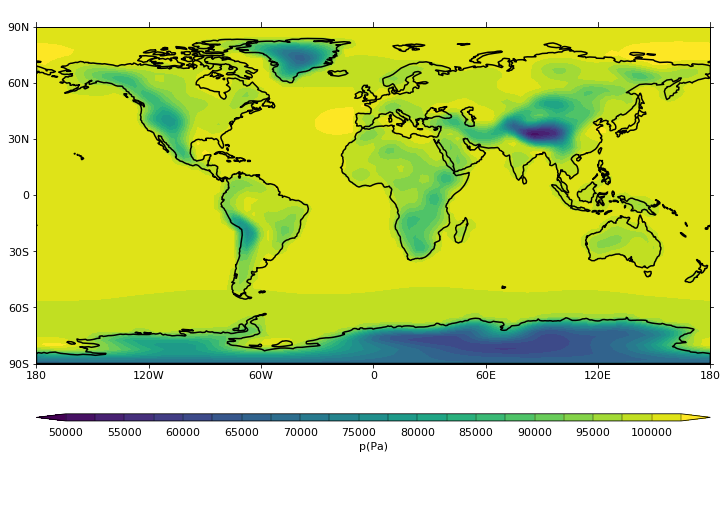

In [3]:
#use cf directly into plot
f=cf.read('/shared/netscratch/ptg21/UM_data/xltln/xltln_p.nc')[0]
cfp.con(f.subspace(time=t1, model_level_number=1), lines=False)

/home/znjs2/.conda/envs/basemap/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


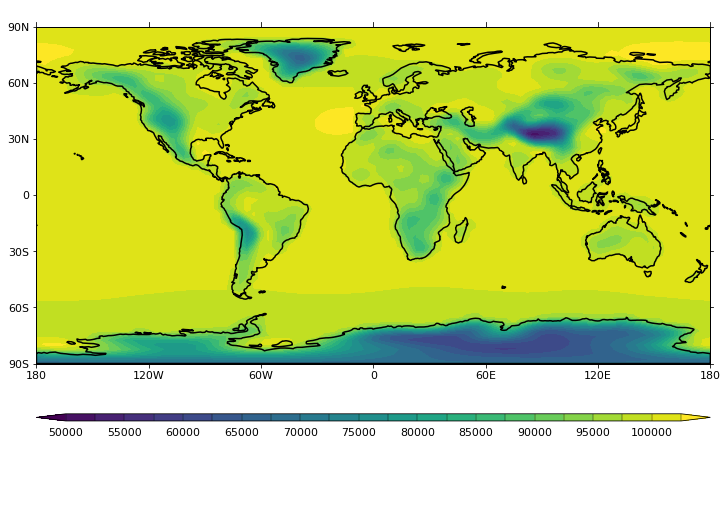

In [4]:
#use arrays extracted with netcdf4
f2=cf.read('/shared/netscratch/ptg21/UM_data/xltln/xltln_p.nc')[0]
f3=f2.subspace(time=t1)
#print(f3)
cfp.con(f=press[0,0,:,:], x=lon, y=lat, ptype=1, lines=False)
#cfp.con(f3.collapse('mean','longitude'))

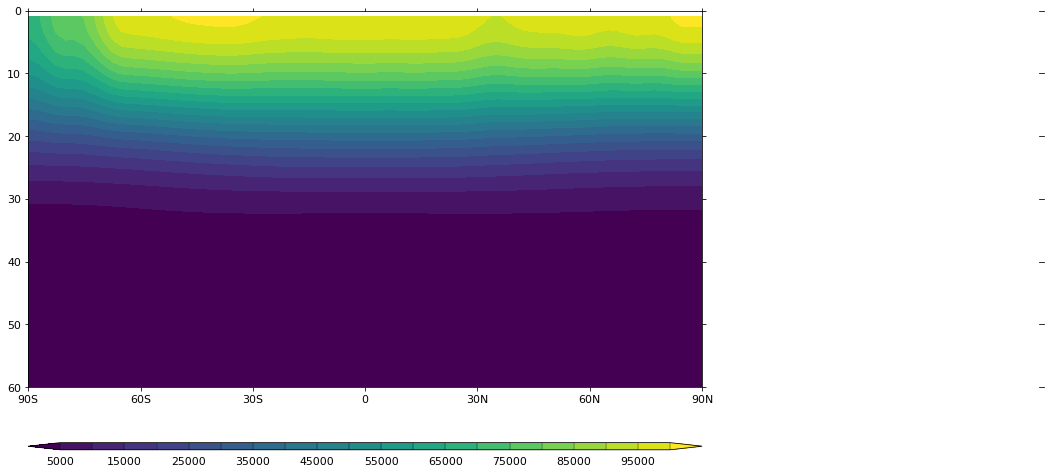

In [5]:
#flips so that highest pressure is at ground level
cfp.con(f=np.mean(press, axis=(0,3)), x=lat, y=alt, ptype=2,lines=False)